# Nephron AI
## Fighting chronic kidney disease using deep learning and fuzzy logic

Chronic kidney disease, or CKD, causes more deaths than breast cancer or prostate cancer. It is the under-recognized public health crisis. It affects an estimated 37 million people in the U.S. (15% of the adult population; more than 1 in 7 adults) and approximately 90% of those with CKD don’t even know they have it. 1 in 3 American adults (approximately 80 million people) is at risk for CKD. CKD is more common in women (15%) than men (12%). CKD is the 9th leading cause of death in the U.S. In 2016, over 500,000 patients received dialysis treatment, and over 200,000 lived with a kidney transplant.

**NephronAI** works in three steps
- Predict the disease
- Predict the cause
- Recovery strategy

**For the prediction of the disease**, we are using a deep learning neural network built on PyTorch that yields more than 99.6% acduracy. Actual model is deployed on Azure Machine Learning.

### Why are we using PyTorch?
The primary reason is that PyTorch uses dynamic computation graphs while Tensorflow (or Keras, or Theano) uses static graphs.Its favoured in research and we are using it for the same purpose.

## Step -1 Importing data

We are using a data set provided by Apollo Hospitals Chennai available publicly on the internet. For more information or resource links refer to the GitHub repository [https://github.com/ayushanand18/nephron-ai](https://github.com/ayushanand18/nephron-ai)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Chronic Kidney Disease Data - Feature Selected & Cleaned MICE (Original).csv', header='infer')
df=pd.DataFrame(data)

In [3]:
df.head(10)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.4,1.2,44.0,1.0,5.200000,yes,1.02,yes,146.657867
1,ckd,11.3,0.8,38.0,4.0,4.686921,no,1.02,no,151.385254
2,ckd,9.6,1.8,31.0,2.0,4.114644,no,1.01,yes,130.725586
3,ckd,11.2,3.8,32.0,4.0,3.900000,yes,1.01,no,111.000000
4,ckd,11.6,1.4,35.0,2.0,4.600000,no,1.01,no,137.998795
5,ckd,12.2,1.1,39.0,3.0,4.400000,yes,1.02,yes,142.000000
6,ckd,12.4,24.0,36.0,0.0,4.188086,no,1.01,no,104.000000
7,ckd,12.4,1.1,44.0,2.0,5.000000,no,1.02,yes,146.358780
8,ckd,10.8,1.9,33.0,3.0,4.000000,yes,1.02,yes,140.041412
9,ckd,9.5,7.2,29.0,2.0,3.700000,yes,1.02,yes,114.000000


Let's look at the data. We are using seaborn library for visualizing using *pairplot*.

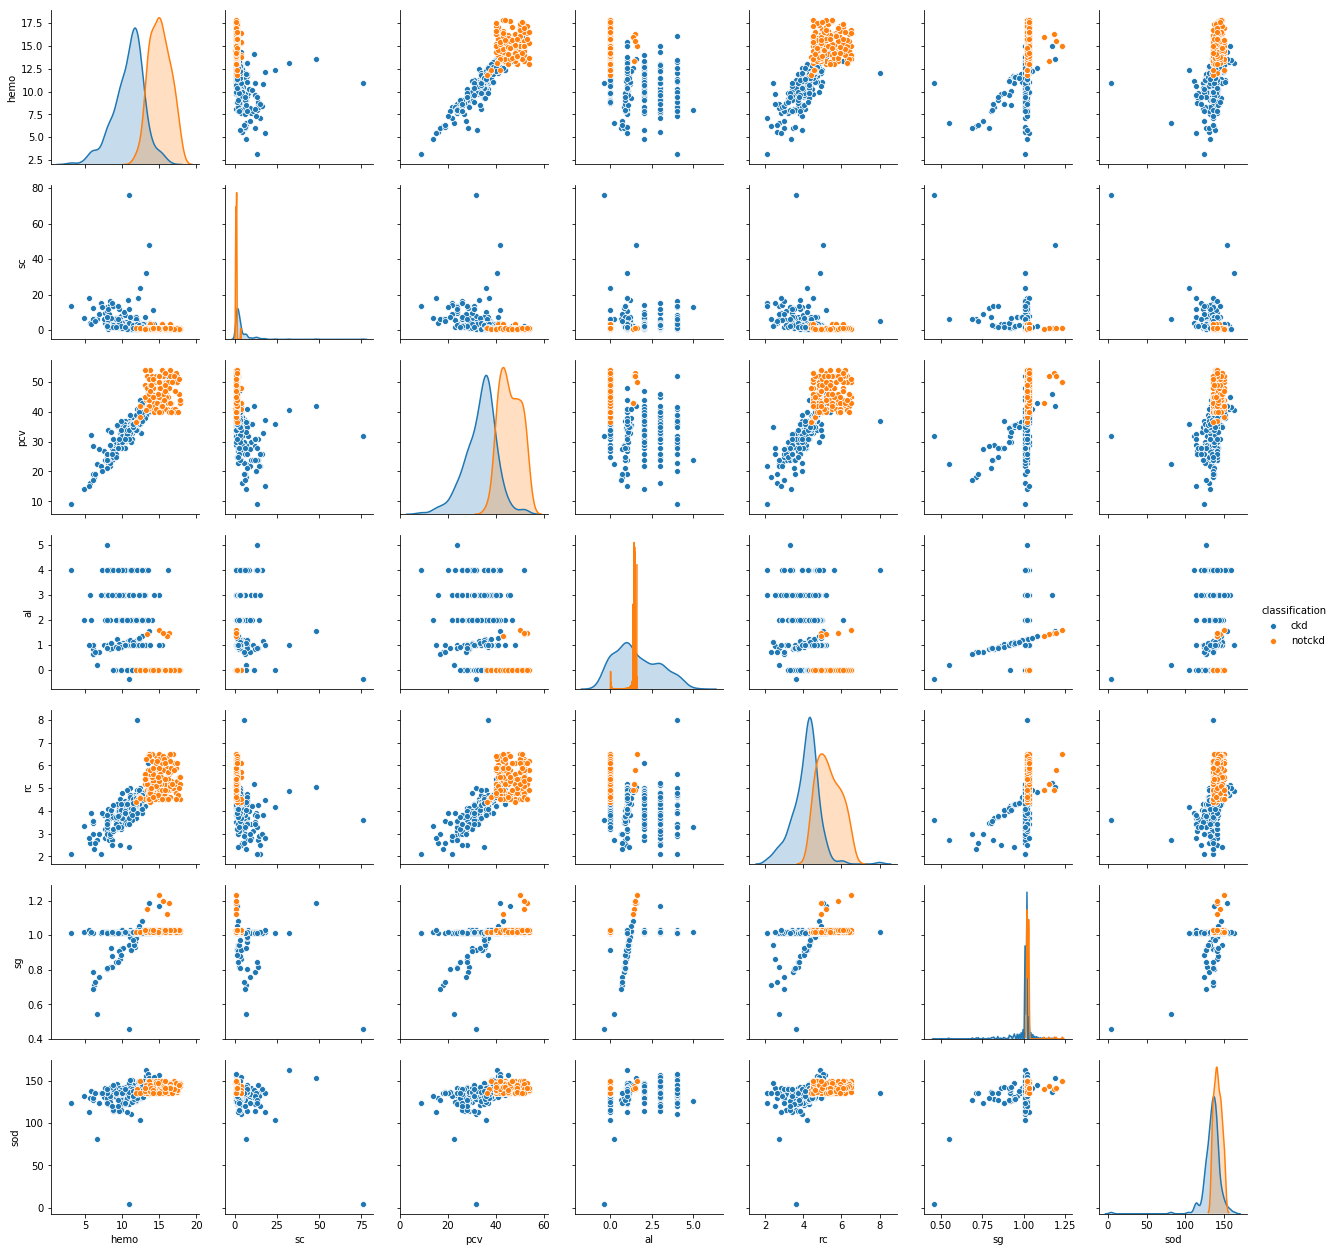

In [7]:
import seaborn as sb
sb.pairplot(df,hue="classification")

In [328]:
df.replace('yes',True)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.400000,1.200000,44.000000,1.000000,5.200000,True,1.020000,True,146.657867
1,ckd,11.300000,0.800000,38.000000,4.000000,4.686921,no,1.020000,no,151.385254
2,ckd,9.600000,1.800000,31.000000,2.000000,4.114644,no,1.010000,True,130.725586
3,ckd,11.200000,3.800000,32.000000,4.000000,3.900000,True,1.010000,no,111.000000
4,ckd,11.600000,1.400000,35.000000,2.000000,4.600000,no,1.010000,no,137.998795
5,ckd,12.200000,1.100000,39.000000,3.000000,4.400000,True,1.020000,True,142.000000
6,ckd,12.400000,24.000000,36.000000,0.000000,4.188086,no,1.010000,no,104.000000
7,ckd,12.400000,1.100000,44.000000,2.000000,5.000000,no,1.020000,True,146.358780
8,ckd,10.800000,1.900000,33.000000,3.000000,4.000000,True,1.020000,True,140.041412
9,ckd,9.500000,7.200000,29.000000,2.000000,3.700000,True,1.020000,True,114.000000


## Step - 2 Data Cleaning

In [329]:
#cleaning the data - replacing yes with 1 and no with 0 in pandas dataframe
df['htn'] = df['htn'].replace('yes',True) #htn column
df['htn'] = df['htn'].replace('no',False)  #htn coloumn
df['dm'] = df['dm'].replace('yes',True)   #dm column
df['dm'] = df['dm'].replace('no',False)    #dm column

df['classification'] = df['classification'].replace('ckd',True)  #ckd = True
df['classification'] = df['classification'].replace('notckd',False)  #notckd = False
#seeing the cleaned data
df

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,True,15.400000,1.200000,44.000000,1.000000,5.200000,True,1.020000,True,146.657867
1,True,11.300000,0.800000,38.000000,4.000000,4.686921,False,1.020000,False,151.385254
2,True,9.600000,1.800000,31.000000,2.000000,4.114644,False,1.010000,True,130.725586
3,True,11.200000,3.800000,32.000000,4.000000,3.900000,True,1.010000,False,111.000000
4,True,11.600000,1.400000,35.000000,2.000000,4.600000,False,1.010000,False,137.998795
5,True,12.200000,1.100000,39.000000,3.000000,4.400000,True,1.020000,True,142.000000
6,True,12.400000,24.000000,36.000000,0.000000,4.188086,False,1.010000,False,104.000000
7,True,12.400000,1.100000,44.000000,2.000000,5.000000,False,1.020000,True,146.358780
8,True,10.800000,1.900000,33.000000,3.000000,4.000000,True,1.020000,True,140.041412
9,True,9.500000,7.200000,29.000000,2.000000,3.700000,True,1.020000,True,114.000000


In [330]:
import numpy as np

In [331]:
#creating numpy array from the pandas dataframe. it's easy to perform calculations on np arrays
array = np.copy(df.values)
array = np.array(array,dtype='float32')

In [ ]:
np.argwhere(np.isnan(array))

In [ ]:
print(array[288,0], array[288,6])
print(array[288,0], array[288,8])
print(array[297,0], array[288,6])
print(array[297,0], array[288,8])
array[288,6] = False
array[288,8] = False
array[297,6] = False
array[297,8] = False

In [408]:
x1=np.copy(array)[:,1:10]
y1=np.copy(array)[:,0:1]
print(y1.shape)
print(x1.shape)

(400, 1)
(400, 9)


Now let us convert these numpy arrays into PyTorch Tensors because we are using PyTorch NN for the project.

In [409]:
import torch
x1,y1=torch.from_numpy(x1),torch.from_numpy(y1)
print(x1.shape,y1.shape)

torch.Size([400, 9]) torch.Size([400, 1])


## Step - 3 Dataloader

For the process of training, we will create a dataloader from the data.

In [410]:
from torch.utils.data import TensorDataset, DataLoader

In [411]:
inputs,targets = x1,y1
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 15.4000,   1.2000,  44.0000,   1.0000,   5.2000,   1.0000,   1.0200,
            1.0000, 146.6579],
         [ 11.3000,   0.8000,  38.0000,   4.0000,   4.6869,   0.0000,   1.0200,
            0.0000, 151.3853],
         [  9.6000,   1.8000,  31.0000,   2.0000,   4.1146,   0.0000,   1.0100,
            1.0000, 130.7256]]), tensor([[1.],
         [1.],
         [1.]]))

In [433]:
# Define data loader
batch_size = 64
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 11.1000,   1.4000,  39.0000,   4.0000,   4.6000,   1.0000,   1.0200,
            0.0000, 129.0000],
         [ 17.4000,   1.1000,  50.0000,   0.0000,   6.1000,   0.0000,   1.0300,
            0.0000, 139.0000],
         [ 11.0000,   1.5000,  39.0000,   4.0000,   4.6888,   1.0000,   1.0200,
            1.0000, 151.4282],
         [ 16.5000,   1.2000,  43.0000,   0.0000,   4.6000,   0.0000,   1.0200,
            0.0000, 139.0000],
         [ 12.1227,  18.0000,  37.3675,   1.0000,   4.4888,   0.0000,   1.0200,
            1.0000, 135.0000],
         [ 14.5000,   0.5000,  41.0000,   0.0000,   5.1000,   0.0000,   1.0300,
            0.0000, 146.0000],
         [ 15.7000,   1.0000,  50.0000,   0.0000,   4.8000,   0.0000,   1.0300,
            0.0000, 135.0000],
         [ 11.0000,   7.5000,  35.0000,   1.1730,   4.6000,   0.0000,   0.9908,
            0.0000, 141.0000],
         [ 10.1000,   2.5000,  29.0000,   2.0000,   4.1188,   1.0000,   1.0200,
            0.0000, 130.9986],
 

In [413]:
data = next(iter(train_dl))
data[0].mean(), data[0].std()

(tensor(23.5648), tensor(44.2941))

In [414]:
import torch.nn.functional as F

## Step - 4 Training using PyTorch

Let us design a neural network and define a train function.

In [415]:
from torch.autograd import Variable

In [436]:
#we are using pytorch deep learning library for this project
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # Inputs to hidden layer linear transformation
        self.linear = nn.Linear(9,15)
        self.relu = nn.Tanh()
        self.linear2 = nn.Linear(15,9)
        self.linear3 = nn.Linear(9,1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.linear3(x)
        
        return x

In [437]:
# Create the network and look at it's text representation
model = Network()
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-10) 

Network(
  (linear): Linear(in_features=9, out_features=15, bias=True)
  (relu): Tanh()
  (linear2): Linear(in_features=15, out_features=9, bias=True)
  (linear3): Linear(in_features=9, out_features=1, bias=True)
)


In [438]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions

            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            opt.zero_grad()
            loss.backward()
            opt.step()
        print('Epoch ' +str(epoch+1) +'/'+ str(num_epochs)+' Training loss: ', loss_fn(model(inputs), targets))

Training the model over 500 epochs.

In [439]:
fit(500, model, loss_fn, opt)

Epoch 1/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 2/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 3/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 4/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 5/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 6/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 7/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 8/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 9/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 10/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 11/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 12/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 13/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 14/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 15/500 Tr

Epoch 119/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 120/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 121/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 122/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 123/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 124/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 125/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 126/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 127/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 128/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 129/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 130/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 131/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 132/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBac

Epoch 235/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 236/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 237/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 238/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 239/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 240/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 241/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 242/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 243/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 244/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 245/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 246/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 247/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 248/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBac

Epoch 349/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 350/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 351/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 352/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 353/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 354/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 355/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 356/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 357/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 358/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 359/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 360/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 361/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 362/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBac

Epoch 466/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 467/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 468/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 469/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 470/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 471/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 472/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 473/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 474/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 475/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 476/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 477/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 478/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBackward>)
Epoch 479/500 Training loss:  tensor(0.3289, grad_fn=<MseLossBac

## Step - 5 Saving the model

In [448]:
# saving the model
PATH = './nephron-ai.pth'
torch.save(model.state_dict(), PATH)